In [11]:
# import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [12]:
# --- 1. DATA INGESTION ---
# ticker definition
ticker = "SAN.MC"

# download daily historical data of the last year
df = yf.download(ticker, period="1y", auto_adjust=True)

# show the first 5 rows of the dataframe
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,SAN.MC,SAN.MC,SAN.MC,SAN.MC,SAN.MC
Date,,,,,
2025-02-24,5.779785,5.823461,5.703110,5.726404,49202019
2025-02-25,5.867137,5.954489,5.745815,5.745815,46958741
2025-02-26,6.048635,6.050576,5.891402,5.896254,33375845
2025-02-27,6.015635,6.083576,5.972930,6.017577,55538738
2025-02-28,6.038929,6.046694,5.901107,5.980695,62452266


In [13]:
# --- 2. QUANTITATIVE LOGIC ---
# calculate the 20-day Simple Moving Average (SMA) and the daily log returns
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['Daily_Return'] = np.log(df['Close']).diff().dropna()

df.head()

Price,Close,High,Low,Open,Volume,SMA_20,Daily_Return
Ticker,SAN.MC,SAN.MC,SAN.MC,SAN.MC,SAN.MC,,
Date,,,,,,,
2025-02-24,5.779785,5.823461,5.703110,5.726404,49202019,NaN,NaN
2025-02-25,5.867137,5.954489,5.745815,5.745815,46958741,NaN,0.015000
2025-02-26,6.048635,6.050576,5.891402,5.896254,33375845,NaN,0.030466
2025-02-27,6.015635,6.083576,5.972930,6.017577,55538738,NaN,-0.005471
2025-02-28,6.038929,6.046694,5.901107,5.980695,62452266,NaN,0.003865


In [14]:
# drop rows with missing values
df_clean = df.dropna()
df_clean.tail()

Price,Close,High,Low,Open,Volume,SMA_20,Daily_Return
Ticker,SAN.MC,SAN.MC,SAN.MC,SAN.MC,SAN.MC,,
Date,,,,,,,
2026-02-17,10.414,10.454,10.218,10.230,21310591,10.5960,0.012173
2026-02-18,10.720,10.768,10.482,10.482,27461707,10.6158,0.028960
2026-02-19,10.584,10.772,10.534,10.770,27158511,10.6134,-0.012768
2026-02-20,10.756,10.798,10.498,10.650,37421586,10.6273,0.016120
2026-02-23,11.058,11.086,10.820,10.820,14958342,10.6475,0.027690


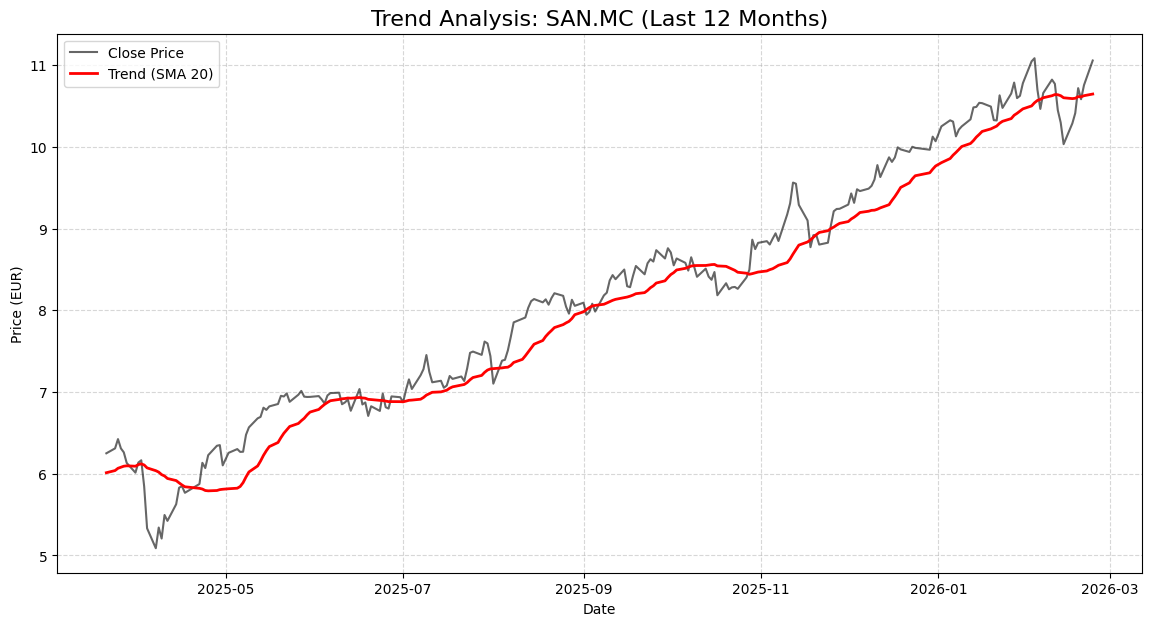

In [15]:
# --- 3. TREND VISUALIZATION ---
plt.figure(figsize=(14, 7))

# Plot the Adjusted Closing Price
plt.plot(df_clean.index, df_clean['Close'], label='Close Price', color='black', alpha=0.6)

# Plot the 20-day SMA to visualize the trend
plt.plot(df_clean.index, df_clean['SMA_20'], label='Trend (SMA 20)', color='red', linewidth=2)

# Styling the plot
plt.title(f'Trend Analysis: {ticker} (Last 12 Months)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price (EUR)')
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

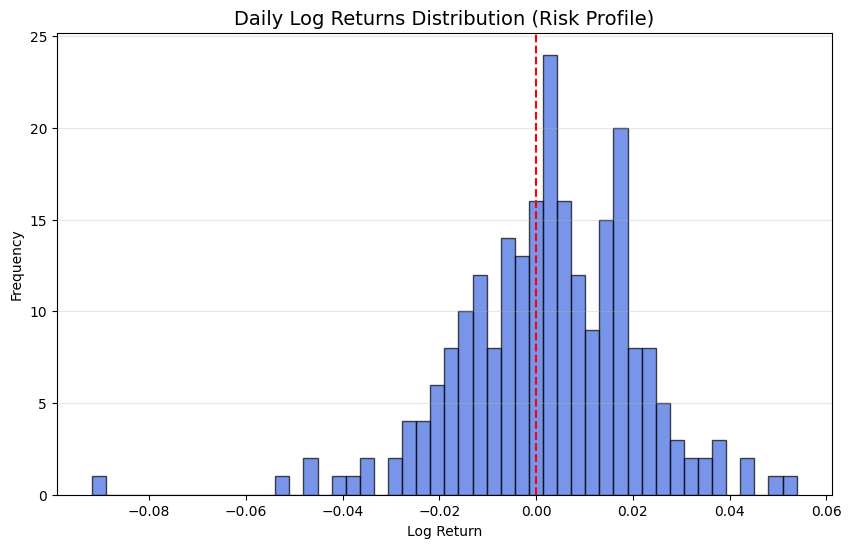

In [17]:
# --- 4. RISK VISUALIZATION ---
plt.figure(figsize=(10, 6))

# Plot a Histogram to observe the distribution of daily log returns (Volatility analysis)
plt.hist(df_clean['Daily_Return'], bins=50, color='royalblue', edgecolor='black', alpha=0.7)

# Add a vertical line at zero to distinguish positive vs. negative performance days
plt.axvline(0, color='red', linestyle='--', linewidth=1.5)

# Styling the histogram
plt.title('Daily Log Returns Distribution (Risk Profile)', fontsize=14)
plt.xlabel('Log Return')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)
plt.show()